Question 1.

Load the data-set “bezdekIris.csv” to python. Detail about the data-set is given in “iris.names” file. For this task, we will consider only three features and two labels. Preprocess the data, where you take the columns sepal width, petal length, and petal width (columns 2, 3, 4) and the two labels setosa and Versicolor (first 100 data points). (5%)

In [140]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [141]:
df = pd.read_csv("bezdekIris.csv" , header=None)
df = df.iloc[:100]
subdf = np.array(df) #create numpy array using a pandas series
data = subdf[:,1:4] #get the necessary columns
data

array([[3.5, 1.4, 0.2],
       [3.0, 1.4, 0.2],
       [3.2, 1.3, 0.2],
       [3.1, 1.5, 0.2],
       [3.6, 1.4, 0.2],
       [3.9, 1.7, 0.4],
       [3.4, 1.4, 0.3],
       [3.4, 1.5, 0.2],
       [2.9, 1.4, 0.2],
       [3.1, 1.5, 0.1],
       [3.7, 1.5, 0.2],
       [3.4, 1.6, 0.2],
       [3.0, 1.4, 0.1],
       [3.0, 1.1, 0.1],
       [4.0, 1.2, 0.2],
       [4.4, 1.5, 0.4],
       [3.9, 1.3, 0.4],
       [3.5, 1.4, 0.3],
       [3.8, 1.7, 0.3],
       [3.8, 1.5, 0.3],
       [3.4, 1.7, 0.2],
       [3.7, 1.5, 0.4],
       [3.6, 1.0, 0.2],
       [3.3, 1.7, 0.5],
       [3.4, 1.9, 0.2],
       [3.0, 1.6, 0.2],
       [3.4, 1.6, 0.4],
       [3.5, 1.5, 0.2],
       [3.4, 1.4, 0.2],
       [3.2, 1.6, 0.2],
       [3.1, 1.6, 0.2],
       [3.4, 1.5, 0.4],
       [4.1, 1.5, 0.1],
       [4.2, 1.4, 0.2],
       [3.1, 1.5, 0.2],
       [3.2, 1.2, 0.2],
       [3.5, 1.3, 0.2],
       [3.6, 1.4, 0.1],
       [3.0, 1.3, 0.2],
       [3.4, 1.5, 0.2],
       [3.5, 1.3, 0.3],
       [2.3, 1.3

Question 2.

Plot the data in a 3-D plot clearly indicating data labels (separate colors for the two labels). 
(5%)

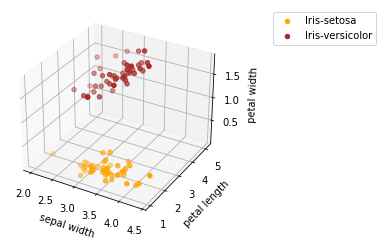

In [142]:
fig = plt.figure()
ax = plt.axes(projection ="3d") #to get 3d plot

ax.scatter(data[0:49,0], data[0:49,1] , data[0:49,2] , color = "orange" , label = "Iris-setosa") #scatters for label Iris-setosa
ax.scatter(data[50:100,0], data[50:100,1] , data[50:100,2] , color = "brown" , label = "Iris-versicolor") #scatters for label Iris-versicolor

ax.legend(bbox_to_anchor=(1.2, 1.0), loc='upper left')
ax.set_xlabel('sepal width')
ax.set_ylabel('petal length')
ax.set_zlabel('petal width')
plt.show()

Question 3.

Solve the primal optimization problem of SVM using the bezdekIris.csv data-set. You can use the “scipy.optimize.minimize” function, documentation for it can be found herehttps://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy optimize.minimize.html. What are the weights of the SVM classifier? (20%)

In [143]:
label = list()  #create label list
for y in subdf:
    if y[4] == "Iris-setosa":   
        label.append(1)         #for all Iris-setosa -> 1
    else:
        label.append(-1)    #for all Iris-versicolor -> -1
    

label = np.array(label) #convert label list to label numpy array

bias = np.ones(100)[: , np.newaxis] #np.newaxis -> convert from horizontal to vertical
attributes = np.hstack((bias , data)) #stack bias and then data

In [144]:
#create primal solution function
def func(w):
    return 0.5*(w[1]**2 + w[2]**2 + w[3]**2)

cons = {'type': 'ineq' , 'fun' : lambda w:label*(np.dot(attributes ,w))-1}

w0 = np.array([1,1,1,1])    #initial guesses

solution = minimize(func, w0, constraints=cons) #minimize function
s=solution.x
s


array([ 1.3,  0.5, -1. , -0.5])

Question 4.

Plot the SVM classifier decision boundary and corresponding support vector boundaries in a one figure (You can refer the code here for plotting in 3-D -
https://stackoverflow.com/questions/36232334 plotting-3d-decision-boundary-from-linearsvm). (15%)


In [145]:
x = np.linspace(1,5,100)
y = np.linspace(1,5,100)

x2,y2 = np.meshgrid(x,y)
z = -(s[0] + (s[1]*x2)+ (s[2]*y2))/s[3]


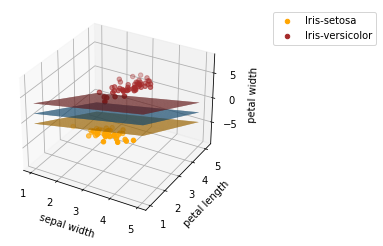

In [146]:
plt.figure()
ax = plt.axes(projection ="3d") #to get 3d plot
ax.scatter(data[0:49,0], data[0:49,1] , data[0:49,2] , color = "orange" , label = "Iris-setosa")    #scatters for label Iris-setosa
ax.scatter(data[50:100,0], data[50:100,1] , data[50:100,2] , color = "brown" , label = "Iris-versicolor")   #scatters for label Iris-versicolor

sv1 = (1-(s[0]+(s[1]*x2 + (s[2]*y2))))/s[3]
sv2 = (-1-(s[0]+(s[1]*x2 + (s[2]*y2))))/s[3]

ax.plot_surface(x2,y2,z) #decision boundary plane
ax.plot_surface(x2,y2,sv1, color = "orange") #support vector boundary for label 1
ax.plot_surface(x2,y2,sv2, color = "brown") #support vector boundary for label -1

ax.legend(bbox_to_anchor=(1.2, 1.0), loc='upper left')
ax.set_xlabel('sepal width')
ax.set_ylabel('petal length')
ax.set_zlabel('petal width')
plt.show()

Question 5.

Solve the dual problem and derive the weights of SVM classifier. Plot decision boundaries and 
support vector boundaries. Compare weights derived from primal and dual problems? What 
can you say about them? (25%)

In [147]:
nrow = data.shape[0]
alpha = np.ones(nrow)

In [148]:
#create dual solution function
def dual(alpha):
    Y = np.matmul(label[: , np.newaxis], label[: , np.newaxis].T)
    X = np.matmul(data, np.transpose(data))
    coef = np.multiply(Y,X) #get quadratic coefficients

    func = 0.5 * np.matmul(np.matmul(alpha,coef), np.transpose(alpha)) - np.sum(alpha)

    return func

constr = ({'type': 'ineq' , 'fun' : lambda alpha: alpha},
        {'type': 'eq' , 'fun' : lambda alpha :np.dot(label,alpha)})

solution = minimize(dual, alpha, method = 'SLSQP' ,constraints=constr)  #minimize function
ss=solution.x

In [150]:
sv_ind = [idx for idx , val in enumerate(ss) if val > 0.001]
sv = data[sv_ind , :]
ss_sv = ss[sv_ind]
label_sv = label[sv_ind]

w = np.sum(np.multiply(np.multiply(ss_sv , label_sv) , np.transpose(sv)) , axis = 1)
b = label[sv_ind[0]] - np.dot(w,data[sv_ind[0]])
weights = np.hstack((b,w))
weights

array([1.3000136037087482, 0.5000117104148503, -1.0000592982010157,
       -0.49990288227205487], dtype=object)

In [151]:
x = np.linspace(1,5,100)
y = np.linspace(1,5,100)

x2,y2 = np.meshgrid(x,y)
z = -(weights[0] + (weights[1]*x2)+ (weights[2]*y2))/weights[3]

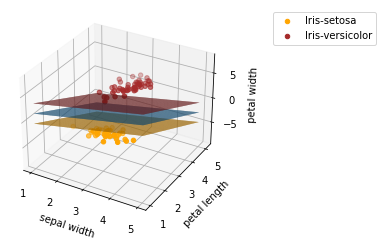

In [152]:
plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(data[0:49,0], data[0:49,1] , data[0:49,2] , color = "orange" , label = "Iris-setosa")    #scatters for label Iris-setosa
ax.scatter(data[50:100,0], data[50:100,1] , data[50:100,2] , color = "brown" , label = "Iris-versicolor")   #scatters for label Iris-versicolor

sv1 = (1-(weights[0]+(weights[1]*x2 + (weights[2]*y2))))/weights[3]
sv2 = (-1-(weights[0]+(weights[1]*x2 + (weights[2]*y2))))/weights[3]

ax.plot_surface(x2,y2,z) #decision boundary plane
ax.plot_surface(x2,y2,sv1, color = "orange") #support vector boundary for label 1
ax.plot_surface(x2,y2,sv2, color = "brown") #support vector boundary for label -1

ax.legend(bbox_to_anchor=(1.2, 1.0), loc='upper left')
ax.set_xlabel('sepal width')
ax.set_ylabel('petal length')
ax.set_zlabel('petal width')
plt.show()

Question 6.

Import the data-set “data.npy” to python. Plot the data. What can you say about this data? (5%)

In [ ]:
data2 = np.load('data.npy')
data_plot = pd.DataFrame(data2, columns = list("XYZ"))

<AxesSubplot:xlabel='X', ylabel='Y'>

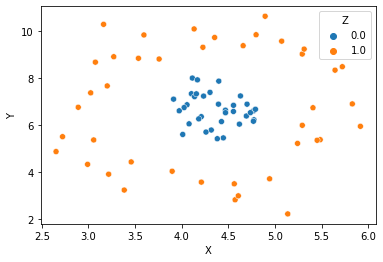

In [ ]:
import seaborn as sb

sb.scatterplot(data=data_plot, x ='X', y = 'Y', hue = 'Z')

Question 7

Use “sklearn” package and fit a SVM classifier with a Radial Basis Function (RBF) kernel. Documentation on sklearn.svm is given here - https://scikitlearn.org/stable/modules/generated/sklearn.svm.SVC.html. Plot the decision boundary to the derived SVM classifier. (10%)

In [ ]:
X0 = data2[: ,[0,1]]
Y0 = data2[:,2]

In [ ]:
from sklearn import svm

svc =svm.SVC(kernel='rbf' , C=10 , gamma=1).fit(X0,Y0)     #rbf - radial basis function
x_min , x_max = X0[: , 0].min() - 1, X0[: , 0].max() + 1
y_min , y_max = X0[: , 1].min() - 1, X0[: , 1].max() + 1

h = (x_max/x_min)/100

xx2 , yy2 = np.meshgrid(np.arange(x_min , x_max , h), np.arange(y_min , y_max , h))

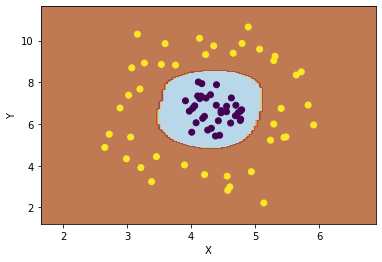

In [ ]:
plt.subplot(1,1,1)

Z0 = svc.predict(np.c_[xx2.ravel() , yy2.ravel()])
Z0 = Z0.reshape(xx2.shape)
plt.contourf(xx2 , yy2 , Z0 , cmap = plt.cm.Paired , alpha = 0.8)

plt.scatter(X0[:,0] , X0[:,1] , c = Y0)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()